In [3]:
import numpy as np
import matplotlib.pyplot as plt

- filter=1 (filter가 1개)
- kernel=(2,2) (filter의 크기)
- stride=1 (1칸씩 이동)

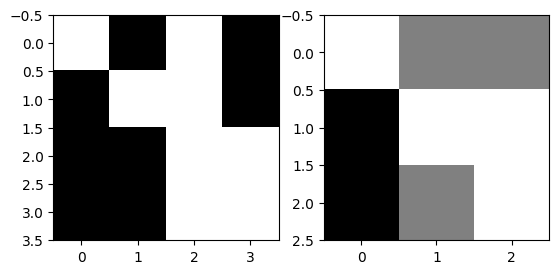

In [15]:
img = np.array([[1,0,1,0],
                [0,1,1,0],
                [0,0,1,1],
                [0,0,1,1]])
# plt.imshow(img, cmap='gray')

filter_data = [[1,0],
               [0,1]]

y_hat = []
for row in range(3):
    y_hat.append([])
    for col in range(3):
        # print(row,row+2, col,col+2)
        tmp = img[row:row+2, col:col+2]
        result = np.sum(tmp*filter_data)
        y_hat[-1].append(result)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y_hat, cmap='gray')

maxpooling 기본값은 커널사이즈 2, stride 2

### 점심

fun(*args) : 튜플 (매개변수가 몇개 들어올지 모를 때)  
fun(**kwargs) : 딕셔너리

### CNN이란?
- Convolutional Neural Network로 커널사이즈 할당된 필터(가중치) 값을 곱한뒤 더해서 생성되는 숫자값을 출력값으로 해서
- 다음레이어로 넘기는 신경망
- Conv2D

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

In [24]:
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.05593448, -0.05281244, -0.02305278,  0.12476127,
            0.10943212, -0.10941213,  0.10490762,  0.05972932,
           -0.08340309, -0.10618928,  0.04432224,  0.04227582,
           -0.06382593,  0.00217544,  0.04959494,  0.02641372,
            0.13112931,  0.00908937,  0.06640147,  0.01809452,
            0.12005885, -0.10690819, -0.05073796,  0.02191105,
           -0.02520022, -0.03948841, -0.02066965, -0.09213613,
            0.08723985, -0.09329677,  0.12910555,  0.0112672 ]],
 
         [[-0.04492164, -0.03097303,  0.08469243, -0.04426158,
           -0.04267158, -0.05503085, -0.00109622, -0.1339138 ,
            0.0593566 ,  0.11636381, -0.09428028,  0.0940671 ,
            0.01986419,  0.092848  , -0.02974357, -0.14087605,
           -0.06511056, -0.01994806, -0.13967343,  0.06892234,
           -0.10311572, -0.10136802,  0.01619551,  0.00419176,
            0.14158078,  0.07866126, -

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(10, (3,3), activation='relu'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 10)        100       
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(10, (3,3), activation='relu'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 1)         10        
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(10, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
